In [1]:
%pylab inline
import numpy as np
from qick import *
from qick.asm_v2 import AveragerProgramV2
from qick.asm_v2 import QickSweep1D
from qick.asm_v2 import AsmV2
import Pyro4
Pyro4.config.SERIALIZER = "pickle"
Pyro4.config.PICKLE_PROTOCOL_VERSION=4
ns_host = "192.168.2.99"# change according to setings..
ns_port = 8888
proxy_name = "myqick"
ns = Pyro4.locateNS(host=ns_host, port=ns_port)
for k,v in ns.list().items():
    print(k,v)
soc = Pyro4.Proxy(ns.lookup(proxy_name))
soccfg = QickConfig(soc.get_cfg())
print(soccfg)

from Spectroscopy import Spectroscopy

QICK library version mismatch: 0.2.291 remote (the board), 0.2.295 local (the PC)
                        This may cause errors, usually KeyError in QickConfig initialization.
                        If this happens, you must bring your versions in sync.


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Pyro.NameServer PYRO:Pyro.NameServer@0.0.0.0:8888
myqick PYRO:obj_88cdfc6ff29643ac8f0a6a8a7f755946@192.168.2.99:33883
QICK running on ZCU216, software version 0.2.291

Firmware configuration (built Fri Nov 29 08:55:09 2024):

	Global clocks (MHz): tProcessor 430.080, RF reference 245.760

	16 signal generator channels:
	0:	axis_signal_gen_v6 - envelope memory 16384 samples (1.709 us)
		fs=9584.640 MHz, fabric=599.040 MHz, 32-bit DDS, range=9584.640 MHz
		DAC tile 0, blk 0 is 0_228, on JHC1
	1:	axis_signal_gen_v6 - envelope memory 16384 samples (1.709 us)
		fs=9584.640 MHz, fabric=599.040 MHz, 32-bit DDS, range=9584.640 MHz
		DAC tile 0, blk 1 is 1_228, on JHC2
	2:	axis_signal_gen_v6 - envelope memory 16384 samples (1.709 us)
		fs=9584.640 MHz, fabric=599.040 MHz, 32-bit DDS, range=9584.640 MHz
		DAC tile 0, blk 2 is 2_228, on JHC1
	3:	axis_signa

In [2]:
spec = Spectroscopy()

trigger offset:  0.3971354166666667  us


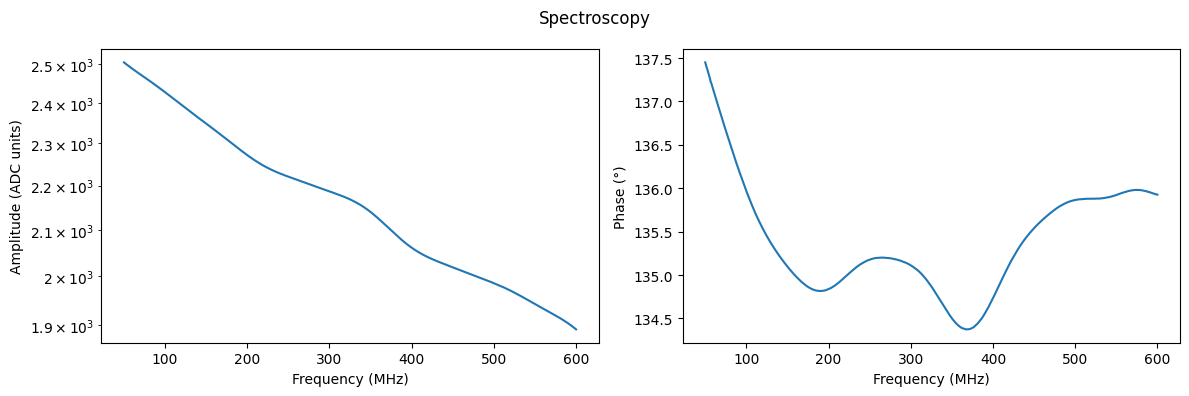

In [3]:
spec.set_parameters(soc, soccfg, 50, 600, 1000, 1000, 1, 12, 0, nqz=1) #  f_start, f_stop, nb_step, nb_rep, power_in, ch_gen, ch_ro)
a = spec.run_spectroscopy()